In [13]:
ls ./data/Google/GOOGL_2006-01-01_to_2018-01-01.csv

./data/Google/GOOGL_2006-01-01_to_2018-01-01.csv*


In [119]:
data=pd.read_csv('./data/Google/GOOGL_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])##使用parse_dates参数可以把指定的列从文本类型转化为Pandas内置时间类型，

<IPython.core.display.Javascript object>

In [20]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [22]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


## 数据预处理

-  缺失值使用ffill的fillna（）函数,用后一时刻的观测值进行填补

In [29]:
df=df.fillna(method='ffill')

In [30]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


- 数据可视化
 - 使用pandas Series对象的asfreq[2]函数对时间序列数据以指定频率作图。其中M代表以天为基本单位

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

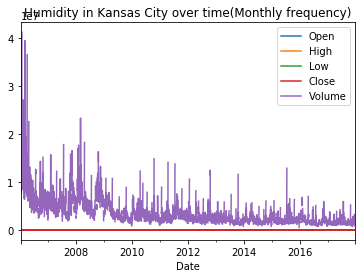

In [96]:
df.asfreq('D').plot() 
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

- 时间戳与时间窗

- 创建时间戳

In [98]:
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

<IPython.core.display.Javascript object>

Timestamp('2017-01-01 12:00:00')

- 创建时间窗

In [100]:
period = pd.Period('2017-01-01')
period

<IPython.core.display.Javascript object>

Period('2017-01-01', 'D')

- 检测时间戳是否在特定时间窗内

In [101]:
period.start_time < timestamp < period.end_time

True

- 将时间戳转换为时间窗

In [102]:
new_period = timestamp.to_period(freq='H')

In [103]:
new_period

Period('2017-01-01 12:00', 'H')

- 将时间窗转换为时间戳

In [104]:
new_timestamp = period.to_timestamp(freq='H', how='start')

In [105]:
new_timestamp

Timestamp('2017-01-01 00:00:00')

- 使用date_range方法
 - date_range 是一个可以返回多个datetime对象组成的序列的方法。它经常被用于创建连续的时间序列（用法非常简单，不要再用for循环创建时间序列了！！）

In [109]:
dr1 = pd.date_range(start='1/1/18', end='1/9/18')

<IPython.core.display.Javascript object>

- Datetime对象

In [116]:
df = pd.to_datetime('01-01-2017')

<IPython.core.display.Javascript object>

In [133]:
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


<IPython.core.display.Javascript object>

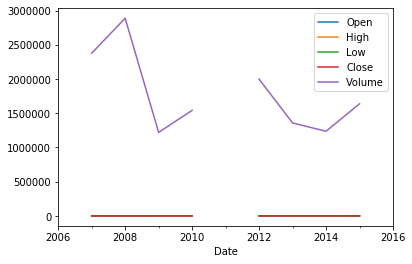

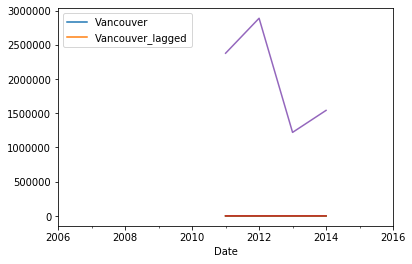

In [141]:
data.asfreq('y').plot(legend=True)
shifted = data.asfreq('y').shift(4).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

-  平移
 - 除此之外我们还可以把时间序列进行平移。这个方法经常用于比较时间序列与之前是否相关，判断是否具有延后性。

In [143]:
#下采样三天进行数据分析
data.resample('3D').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,218.953333,222.916667,216.793333,222.173333,1.308182e+07
2006-01-06,228.660000,235.490000,226.850000,233.060000,1.775952e+07
2006-01-09,233.916667,236.696667,232.256667,234.946667,1.030307e+07
2006-01-12,234.745000,235.705000,231.010000,232.705000,8.892716e+06
2006-01-15,231.760000,235.180000,231.500000,233.790000,8.335300e+06
...,...,...,...,...,...
2017-12-16,1076.450000,1086.490000,1070.370000,1085.090000,1.514601e+06
2017-12-19,1079.776667,1081.246667,1069.956667,1074.730000,1.345312e+06
2017-12-22,1070.000000,1071.720000,1067.640000,1068.860000,8.894460e+05


- 通过Series对象的shift方法可以将数据平移一个单位

In [150]:
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [151]:
data.shift()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,211.47,218.05,209.32,217.83,13137450.0,GOOGL
2006-01-05,222.17,224.70,220.09,222.84,15292353.0,GOOGL
2006-01-06,223.22,226.00,220.97,225.85,10815661.0,GOOGL
2006-01-09,228.66,235.49,226.85,233.06,17759521.0,GOOGL
...,...,...,...,...,...,...
2017-12-22,1075.39,1077.52,1069.00,1070.85,1282025.0,GOOGL
2017-12-26,1070.00,1071.72,1067.64,1068.86,889446.0,GOOGL
2017-12-27,1068.64,1068.86,1058.64,1065.85,918767.0,GOOGL


In [149]:
##相除操作
data.High.div(data.High.shift())

Date
2006-01-03         NaN
2006-01-04    1.030498
2006-01-05    1.005785
2006-01-06    1.041991
2006-01-09    1.006157
                ...   
2017-12-22    0.994617
2017-12-26    0.997331
2017-12-27    0.999448
2017-12-28    0.996789
2017-12-29    0.993623
Name: High, Length: 3019, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'open'

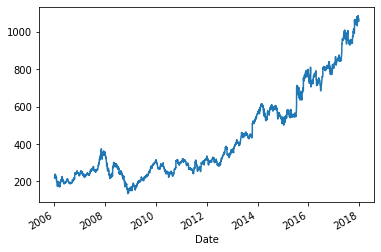

In [154]:
##比较多个时间序列
data.High.plot()
data.open.plot()
plt.legend(['Google','Microsoft'])